## Devoir PHYS-F-302, année académique 2019-2020

Soit l'équation différentielle linéaire à coefficients constants:

\begin{align}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0\hspace{5cm} (1)
\end{align}

où $f$ est une fonction de la variable $x\in [0\ 1]$. Par ailleurs, on a les conditions aux bords suivantes:

$$
f(0)=a, f'(0)=b, f(1)=c, f'(1)=d \hspace{3cm} (2)
$$

In [1]:
import numpy as np
from matplotlib import pyplot
import numba
from numba import jit

### Question 1 (2 points)

Quelle est la solution générale de l'équation (1)?

<font color='blue'>
Supposons une solution de la forme $f(x)=e^{\lambda x}$ et injectons ce résultat dans l'équation différentielle. Nous obtenons alors:

\begin{align}
\frac{\partial^4}{\partial x^4} \left(e^{\lambda x}\right) - 5 \frac{\partial^2}{\partial x^2}\left(e^{\lambda x}\right) + 4\left(e^{\lambda x}\right) & = 0 \\
\lambda^4 \cdot e^{\lambda x} - 5\lambda^2 \cdot e^{\lambda x} + 4e^{\lambda x} & = 0 \\
\end{align}

Mettons en évidence notre $e^{\lambda x}$,

\begin{align}
\left(\lambda^4 - 5\lambda^2 + 4 \right) \left(e^{\lambda x}\right) & = 0
\end{align}

On rejette la solution triviale $e^{\lambda x}=0$, nous allons rechercher les solutions convergente. Ces solutions ne dépendent donc que de l'équation polynomiale $\lambda^4  - 5\lambda^2 + 4=0$. Remarquons que nous résolvons une équation caractéristique de notre EDO:

\begin{align}
& \left(\lambda^4 - 5\lambda^2 + 4 \right) & = 0\\
\iff & \left(\lambda - 2\right)\left(\lambda - 1\right)\left(\lambda + 1\right)\left(\lambda + 2\right) & = 0
\end{align}

Lambda a donc pour solutions:
\begin{align}
\lambda & = \left\{ -2, -1, 1, 2\right\}
\end{align}.


La solution générale à notre EDO devient donc

\begin{align}
f(x) & = C_1\cdot e^{-2x} + C_2\cdot e^{-x} + C_3\cdot e^{x} + C_4\cdot e^{2x}
\end{align}
<font>

### Question 2 (3 points)

Ecrire un code en python qui permet d'évaluer les constantes d'intégration de la solution générale en termes des conditions aux bords (2). Pour cette question vous pouvez vous servir de n'importe quelle routine fournie par numpy.

In [8]:
def boundaries_solve(bci,bcf,dbci,dbcf):
    a=np.array([[1,1,1,1],[np.exp(-2),np.exp(-1),np.exp(1),np.exp(2)],
                [-2,-1,1,2],[-2*np.exp(-2),-1*np.exp(-1),np.exp(1),2*np.exp(2)]])
    b=np.array([bci,bcf,dbci,dbcf])
    x=np.linalg.solve(a,b)
    return x

### Question 3 (2 points)

Que vaut la solution de l'équation (1) pour $a=0, b=0, c=1, d=-1$. Représentez cette fonction sur un graphique.

In [12]:
C1, C2, C3, C4 = boundaries_solve(0,1,0,-1)
print(C1,C2,C3,C4)

3.352281437944153 -5.337391764428322 2.6030495415083523 -0.6179392150241839


In [35]:
p0=C1*np.exp(-2*x)+C2*np.exp(-x)+C3*np.exp(x)+C4*np.exp(2*x)
print(p0)

[-3.33066907e-16  4.06198103e-04  1.60911384e-03  3.58552636e-03
  6.31260149e-03  9.76788027e-03  1.39292676e-02  1.87750210e-02
  2.42837398e-02  3.04343538e-02  3.72061130e-02  4.45785767e-02
  5.25316031e-02  6.10453388e-02  7.01002087e-02  7.96769060e-02
  8.97563818e-02  1.00319836e-01  1.11348705e-01  1.22824657e-01
  1.34729576e-01  1.47045558e-01  1.59754899e-01  1.72840084e-01
  1.86283782e-01  2.00068831e-01  2.14178235e-01  2.28595153e-01
  2.43302885e-01  2.58284872e-01  2.73524680e-01  2.89005992e-01
  3.04712605e-01  3.20628413e-01  3.36737406e-01  3.53023654e-01
  3.69471305e-01  3.86064573e-01  4.02787730e-01  4.19625096e-01
  4.36561034e-01  4.53579938e-01  4.70666228e-01  4.87804337e-01
  5.04978707e-01  5.22173778e-01  5.39373980e-01  5.56563725e-01
  5.73727398e-01  5.90849348e-01  6.07913882e-01  6.24905254e-01
  6.41807654e-01  6.58605208e-01  6.75281960e-01  6.91821868e-01
  7.08208795e-01  7.24426500e-01  7.40458628e-01  7.56288705e-01
  7.71900122e-01  7.87276

No handles with labels found to put in legend.


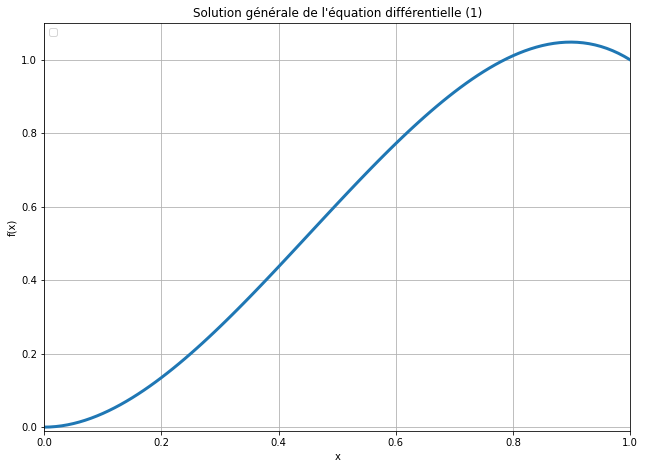

In [34]:
nx=101
x=np.linspace(0.,1.,nx)
#--------------------------------- Graphe
pyplot.figure(figsize=(10.5,7.5))
pyplot.title('Solution générale de l\'équation différentielle (1)' )
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.plot(x, p0, label='',
            color='C0', linestyle='-',linewidth=3)
pyplot.legend(loc='upper left')
pyplot.xlim(0,1)
pyplot.ylim(-0.01,1.1)
pyplot.grid()

### Question 4 (6 points)

Résoudre l'équation (1) avec la méthode Gauss-Seidel vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

### Question 5 (7 points)

Résoudre l'équation (1) avec la méthode du gradient conjugué vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

## Consignes:
    
- Pour les questions 4 et 5 prendre $nx=101$ pour discrétiser l'interval $x\in [0\ 1]$.
- Faites converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $<10^{-8}$.

In [16]:
def L2_rel_error(p, pn):
    ''' Compute the relative L2 norm of the difference
    Parameters:
    ----------
    p : array of float
        array 1
    pn: array of float
        array 2
    Returns:
    -------
    Relative L2 norm of the difference
    '''
    return np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))

In [29]:
nx=101
x=np.linspace(0.,1.,nx)
def laplace_2d_gauss_seidel(p0, nx, maxiter=30000, rtol=1e-8):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Gauss-Seidel relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    conv : list
        The convergence history as a list of floats.
    """
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for i in range(1, nx - 1):
            p[i] = 0.5 * (p[i - 1] + p[i + 1])
        diff = L2_rel_error(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [41]:
p, ites, conv_gs =laplace_2d_gauss_seidel(p0, nx, maxiter=30000, rtol=1e-8)
print('The solution of the equation (1) with the Gauss-Seidel method is (for x in [0,1]): \n {}'.format(p))
print('Gauss-Seidel relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv_gs[-1]))

The solution of the equation (1) with the Gauss-Seidel method is (for x in [0,1]): 
 [-3.33066907e-16  1.00002680e-02  2.00005354e-02  3.00008020e-02
  4.00010676e-02  5.00013318e-02  6.00015945e-02  7.00018554e-02
  8.00021141e-02  9.00023706e-02  1.00002624e-01  1.10002875e-01
  1.20003123e-01  1.30003368e-01  1.40003609e-01  1.50003846e-01
  1.60004079e-01  1.70004308e-01  1.80004533e-01  1.90004752e-01
  2.00004967e-01  2.10005177e-01  2.20005382e-01  2.30005580e-01
  2.40005774e-01  2.50005961e-01  2.60006142e-01  2.70006317e-01
  2.80006486e-01  2.90006648e-01  3.00006803e-01  3.10006952e-01
  3.20007093e-01  3.30007228e-01  3.40007355e-01  3.50007474e-01
  3.60007586e-01  3.70007691e-01  3.80007788e-01  3.90007877e-01
  4.00007958e-01  4.10008032e-01  4.20008097e-01  4.30008154e-01
  4.40008203e-01  4.50008245e-01  4.60008277e-01  4.70008302e-01
  4.80008318e-01  4.90008327e-01  5.00008327e-01  5.10008319e-01
  5.20008302e-01  5.30008277e-01  5.40008245e-01  5.50008204e-01
  5.6